In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [20]:
balance_data = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
balance_data = balance_data.replace('?', '0')

In [21]:
balance_data.shape

(2215, 147)

In [22]:
balance_data.head

<bound method NDFrame.head of                Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          0             0     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
5             Springfieldcity    MO          0             0     1   
6                 Norwoodtown    MA         21         50250     1   
7                Andersoncity    IN          0             0     1   
8                   Fargocity    ND         17         25700     1   
9                    Wacocity    TX          0             0     1   
10                Shermancity    TX          0             0     1   
11               SanPablocity    CA          0             0     1   
12           BowlingGreencity    KY          0             0

In [23]:
violent_crimes = list(map(float, balance_data.ViolentCrimesPerPop))

In [24]:
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)

In [25]:
violent_crimes_mean

530.3040045146731

In [26]:
balance_data['mean_violent_crimes'] = violent_crimes_mean

In [27]:
balance_data['violent_crime_occurence'] = np.where(violent_crimes>=balance_data['mean_violent_crimes'], '1', '0')

In [28]:
balance_data.groupby('violent_crime_occurence').mean()

fold    population  householdsize  racepctblack  \
violent_crime_occurence                                                        
0                        5.509979  32689.042670       2.707529      4.716284   
1                        5.464567  92072.383202       2.706942     18.142375   

                         racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
violent_crime_occurence                                                         
0                           90.651535      2.434721     4.499188    14.372340   
1                           71.258031      3.119226    14.530604    14.585984   

                         agePct12t29  agePct16t24         ...           \
violent_crime_occurence                                   ...            
0                          27.183125    13.781672         ...            
1                          28.525249    14.344055         ...            

                         PctSameHouse85  PctSameCity85  PctSameState85  \
violent_crime_occurence                                                  
0                             52.989732      77.301493       88.433861   
1                             48.771535      77.620039       87.497874   

                          LandArea      PopDens  PctUsePubTrans  \
violent_crime_occurence                                           
0                        20.915279  2383.545630        2.755100   
1                        39.823228  3547.116535        3.586522   

                         LemasPctOfficDrugUn    murders  murdPerPop  \
violent_crime_occurence                                               
0                                   0.433827   2.309704    2.775354   
1                                   2.021929  18.166667   11.739829   

                         mean_violent_crimes  
violent_crime_occurence                       
0                                 530.304005  
1                                 530.304005  

[2 rows x 105 columns]

In [29]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
balance_data = balance_data[['population','householdsize','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
balance_data = balance_data
X = balance_data.drop('violent_crime_occurence', axis=1)
y = balance_data['violent_crime_occurence']
print(X)
print(y)

      population  householdsize  medIncome  PctUnemployed PolicReqPerOffic  \
0          11980           3.10      75122           2.70                0   
1          23123           2.82      47917           2.43                0   
2          29344           2.43      35669           4.01                0   
3          16656           2.40      20580           9.86                0   
4          11245           2.76      17390           9.08                0   
5         140494           2.45      21577           5.72                0   
6          28700           2.60      42805           4.85                0   
7          59459           2.45      23221           8.19                0   
8          74111           2.46      25326           4.18                0   
9         103590           2.62      17852           8.39            370.9   
10         31601           2.54      24763           7.19                0   
11         25158           2.89      25479          10.16       

In [30]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 1)
X_train_RandomForest, X_test_RandomForest, Y_train_RandomForest, Y_test_RandomForest = train_test_split(X, y, random_state=1)

In [31]:
clf_gini = RandomForestClassifier(criterion = "gini", \
                                  random_state = 200,max_depth=30, min_samples_split=9, min_samples_leaf=6)
clf_gini

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

In [32]:
clf_gini.fit(X_train_RandomForest, Y_train_RandomForest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

In [33]:
Y_Pred_RandomForest = clf_gini.predict(X_test_RandomForest)

In [34]:
ac=accuracy_score(Y_test_RandomForest,Y_Pred_RandomForest)*100
ac

86.64259927797833

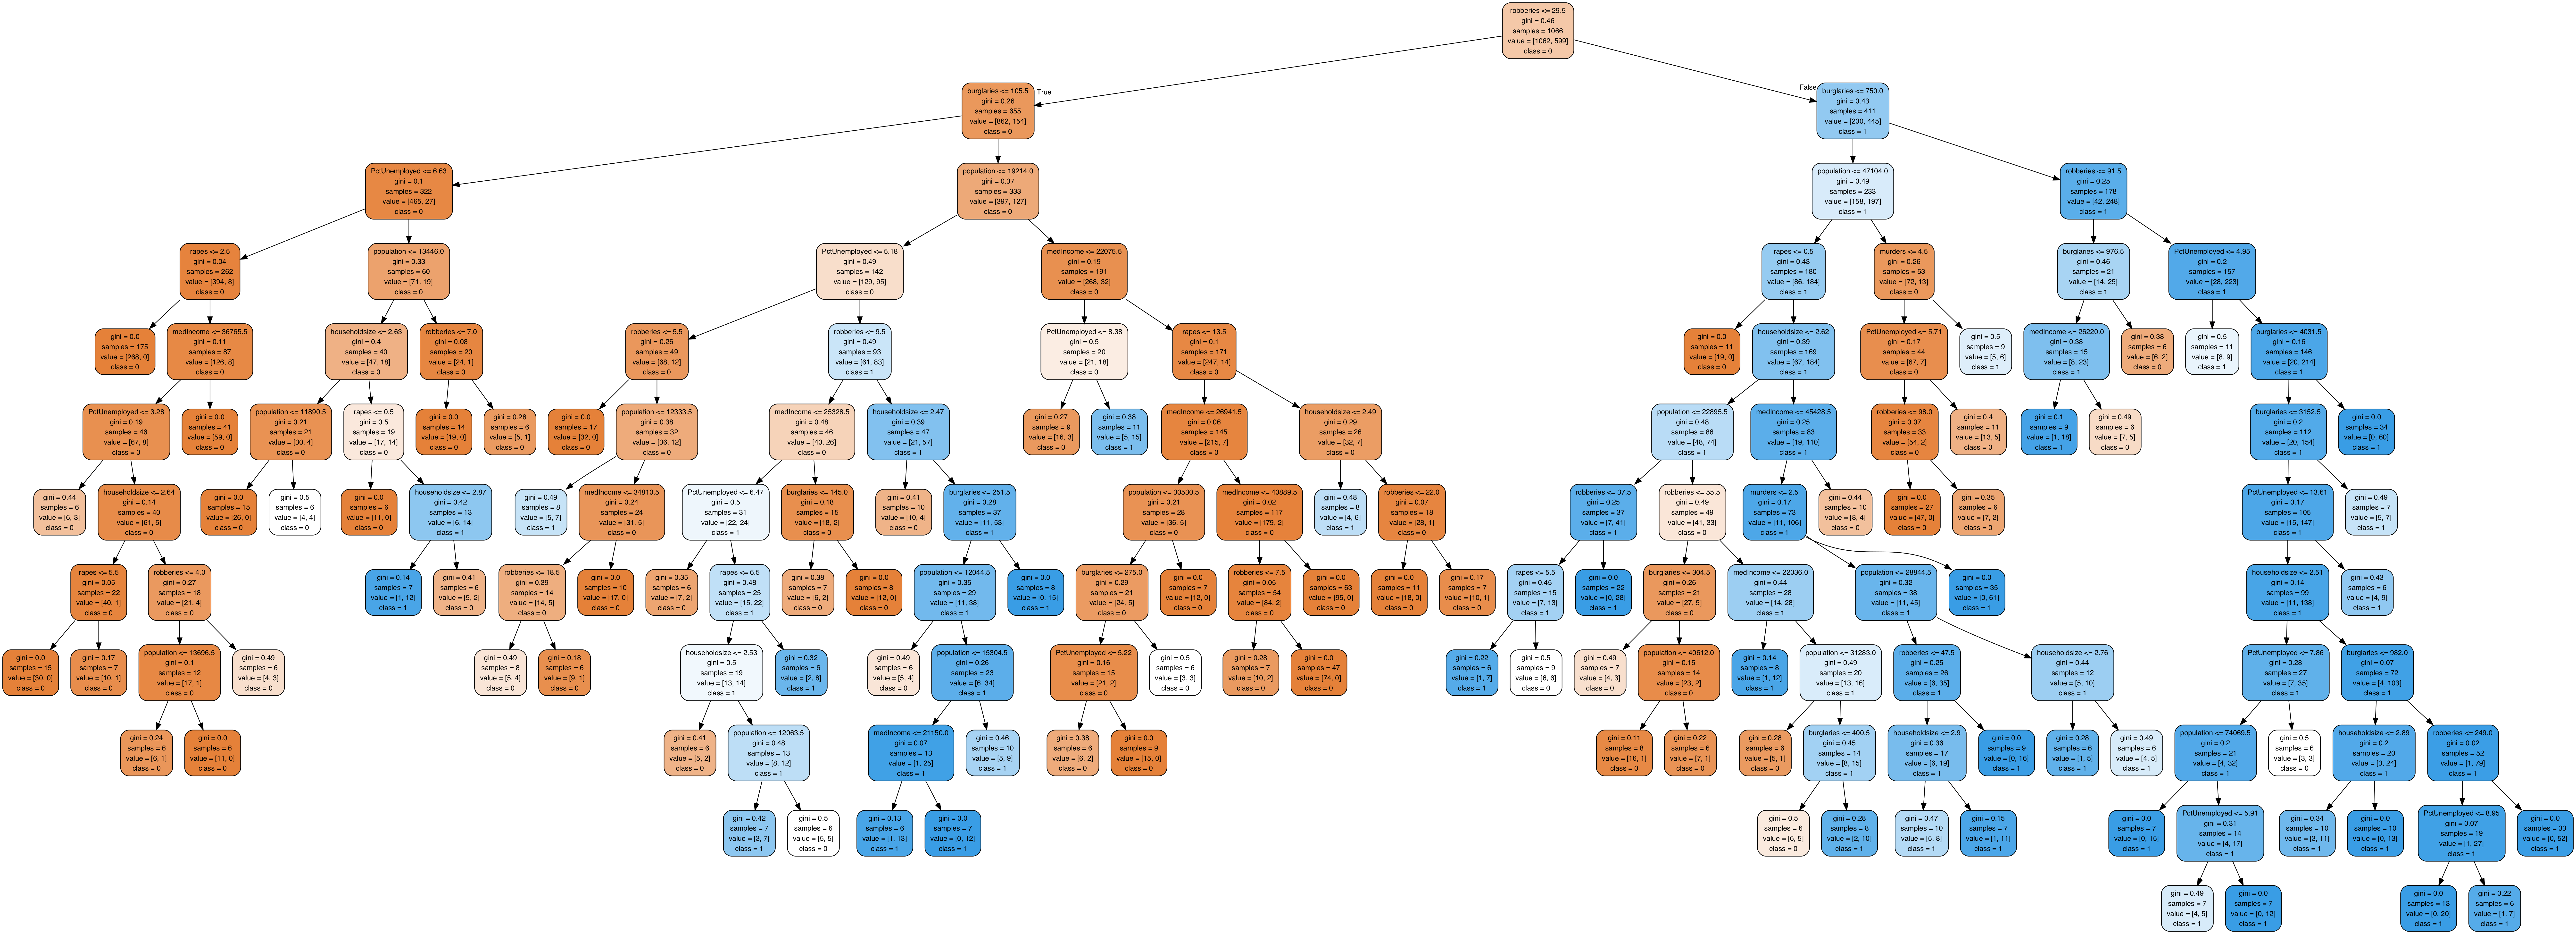

In [35]:
estimator = clf_gini.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_200.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_200.dot', '-o', 'tree_200.png', '-Gdpi=200'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_200.png')

#Creating the Confusion Matrix to make further conclusion

In [36]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_RandomForest, Y_Pred_RandomForest)
cnf_matrix_RandomForest

array([[345,  34],
       [ 40, 135]])

Model Accuracy for Random Forest: 0.8664259927797834


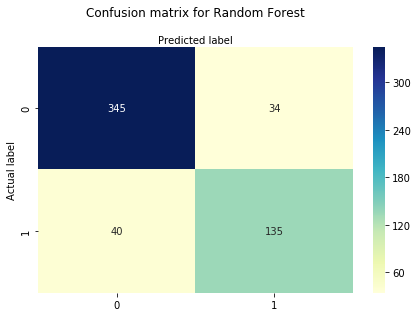

In [37]:
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_RandomForest, Y_Pred_RandomForest))
